# **Practical 6**

# **Predicting Sports Winners with Decision Tree**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("Dataset/csk_mi.csv")

In [3]:
df.drop(["Unnamed: 0","city"],axis=1,inplace=True)

In [4]:
df.head()

,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
0,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,Chennai Super Kings,6,0
1,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9
2,2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Mumbai Indians,19,0
3,2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Chennai Super Kings,0,7
4,2010,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,5


# Match Winner

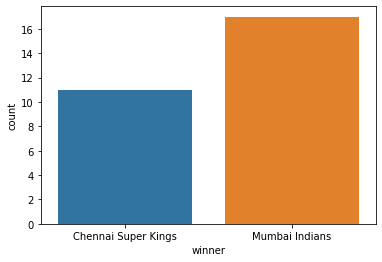

In [5]:
sns.countplot(df['winner'])

# Toss Winner

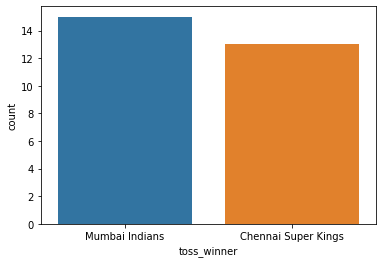

In [6]:
sns.countplot(df['toss_winner'])

# toss_winner vs match_winner

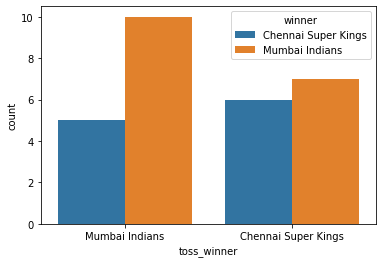

In [7]:
sns.countplot(df['toss_winner'],hue=df['winner'])

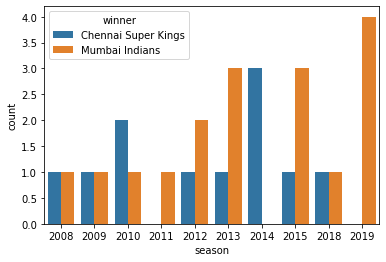

In [8]:
sns.countplot(df['season'],hue=df['winner'])

In [9]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()

In [10]:
df.head()

,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
0,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,Chennai Super Kings,6,0
1,2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9
2,2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Mumbai Indians,19,0
3,2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Chennai Super Kings,0,7
4,2010,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,5


In [11]:
df['season']= label_encoder.fit_transform(df['season'])
df['team1']= label_encoder.fit_transform(df['team1'])
df['team2']= label_encoder.fit_transform(df['team2'])
df['toss_winner']= label_encoder.fit_transform(df['toss_winner'])
df['toss_decision']= label_encoder.fit_transform(df['toss_decision'])
df['result']= label_encoder.fit_transform(df['result'])
df['winner']= label_encoder.fit_transform(df['winner'])

In [12]:
df.columns

Index(['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result',
       'winner', 'win_by_runs', 'win_by_wickets'],
      dtype='object')

In [13]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [14]:
feature_cols =['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result','win_by_runs', 'win_by_wickets']
X = df[feature_cols] # Features
y = df.winner # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [18]:
print("Accuracy: {0} \n".format(round((metrics.accuracy_score(y_test, y_pred))*100,2)))

Accuracy: 33.33 

